In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
df_marketing = pd.read_csv(r"C:\Users\apico\Downloads\marketing_campaign.csv", delimiter="\t")
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df_marketing.shape

(2240, 29)

In [4]:
# Creamos una nueva columna para averiguar la edad de cada cliente.

# Convertir la columna 'Dt_Customer' a formato de fecha
df_marketing['Dt_Customer'] = pd.to_datetime(df_marketing['Dt_Customer'])

# Extraer el año de la columna 'Dt_Customer'
df_marketing['Año'] = df_marketing['Dt_Customer'].dt.year

# Restar el valor de la columna 'Year_Birth' por el año
df_marketing['AgeCustomer'] = df_marketing['Año'] - df_marketing['Year_Birth'] 

C:\Users\apico\AppData\Local\Temp\ipykernel_6584\1235529143.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_marketing['Dt_Customer'] = pd.to_datetime(df_marketing['Dt_Customer'])


In [5]:
# Elimanos registros con personas que tienen mas de 100 años
df_marketing = df_marketing.drop(df_marketing[df_marketing['AgeCustomer'] >= 100].index)

In [6]:
# Eliminamos registros de 'Income' con más de 200000€
df_marketing = df_marketing.drop(df_marketing[df_marketing['Income'] >= 200000].index)

In [7]:
# Eliminamos columnas 'Año' y 'Year_Birth' que ya nos sirven

df_marketing = df_marketing.drop(columns=['Año', 'Year_Birth'])

In [8]:
# Eliminamos registro atípico en columnas 'Kidhome' y 'Teenhome'
df_marketing = df_marketing.drop(df_marketing[df_marketing['Kidhome'] == 2].index)
df_marketing = df_marketing.drop(df_marketing[df_marketing['Teenhome'] == 2].index)
df_marketing.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeCustomer
0,5524,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,0,3,11,1,55
1,2174,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,3,11,0,60
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,48
3,6182,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,3,11,0,30
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,33


In [9]:
# Eliminamos datos nulos de la columna Income
df_marketing1 = df_marketing.dropna()

In [10]:
# Separamos columnas númericas de las no numéricas.

df_marketing2 = df_marketing1

# Seleccionar columnas numéricas

columnas_numericas = df_marketing2.select_dtypes(include=['int', 'float'])

# Seleccionar columnas no numéricas

columnas_no_numericas = df_marketing2.select_dtypes(exclude=['int', 'float'])

columnas_numericas.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeCustomer
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,3,11,1,55
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,3,11,0,60
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,3,11,0,48
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,3,11,0,30
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,3,11,0,33


In [11]:
# Eliminamos columnas que contienen valores no relevantes
columnas_numericas1 = columnas_numericas.drop(columns=['Z_CostContact', 'Z_Revenue'])
columnas_numericas1.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AgeCustomer
0,5524,58138.0,0,0,58,635,88,546,172,88,...,4,7,0,0,0,0,0,0,1,55
1,2174,46344.0,1,1,38,11,1,6,2,1,...,2,5,0,0,0,0,0,0,0,60
2,4141,71613.0,0,0,26,426,49,127,111,21,...,10,4,0,0,0,0,0,0,0,48
3,6182,26646.0,1,0,26,11,4,20,10,3,...,4,6,0,0,0,0,0,0,0,30
4,5324,58293.0,1,0,94,173,43,118,46,27,...,6,5,0,0,0,0,0,0,0,33


In [12]:
# Relizamos la media de todas las columnas de Cmp y las eliminamos
columnas_numericas1['MediaCmp'] = columnas_numericas1[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].mean(axis=1)
columnas_numericas1 = columnas_numericas1.drop(columns=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'])
columnas_numericas1.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AgeCustomer,MediaCmp
0,5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,55,0.0
1,2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60,0.0
2,4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,48,0.0
3,6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30,0.0
4,5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,33,0.0


In [13]:
# Creamos Columnas 'TotalPurchases' y 'TotalMnt'
columnas_numericas1['TotalPurchases'] = columnas_numericas1['NumWebPurchases'] + columnas_numericas1['NumCatalogPurchases'] + columnas_numericas1['NumStorePurchases']
columnas_numericas1['TotalMnt'] = columnas_numericas1['MntWines'] + columnas_numericas1['MntFruits'] + columnas_numericas1['MntMeatProducts'] + columnas_numericas1['MntSweetProducts'] + columnas_numericas1['MntGoldProds']

columnas_numericas1.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AgeCustomer,MediaCmp,TotalPurchases,TotalMnt
0,5524,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,0,1,55,0.0,22,1445
1,2174,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,0,0,60,0.0,4,25
2,4141,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,0,0,48,0.0,20,665
3,6182,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,0,0,30,0.0,6,43
4,5324,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,0,0,33,0.0,14,376


# Exploración de datos

<function matplotlib.pyplot.show(close=None, block=None)>

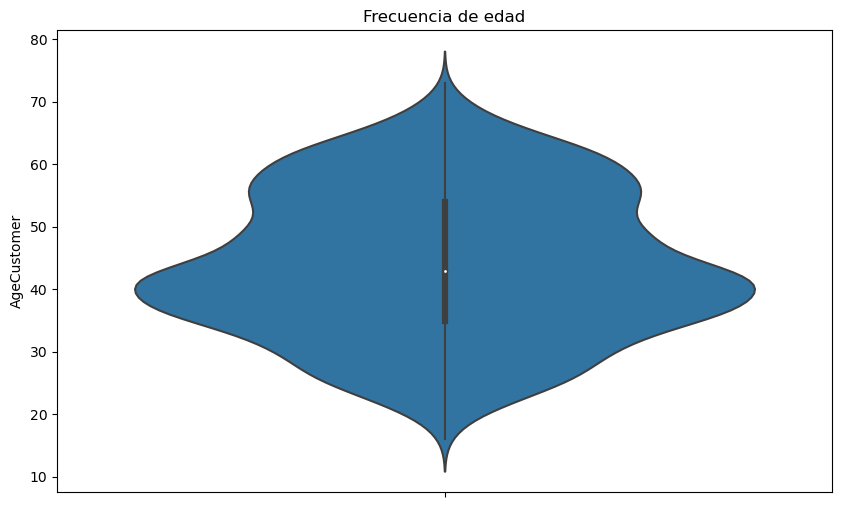

In [14]:
# Volumen de clientes que hay para cada rango de edad
plt.figure(figsize = (10,6))
plt.title('Frecuencia de edad')
sns.axes_style('dark')
sns.violinplot(y=columnas_numericas1['AgeCustomer'])
plt.show


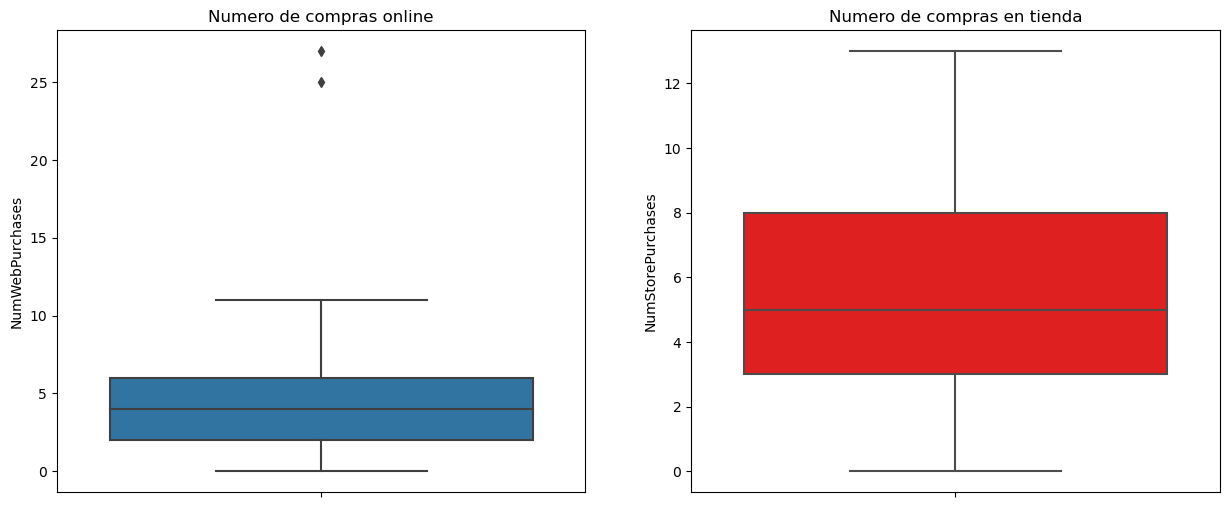

In [15]:
# Realación entre compras online y compras en tienda
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=columnas_numericas1['NumWebPurchases'])
plt.title('Numero de compras online')
plt.subplot(1,2,2)
sns.boxplot(y=columnas_numericas1['NumStorePurchases'], color = 'red')
plt.title('Numero de compras en tienda')
plt.show()

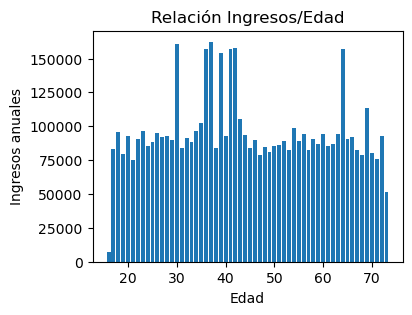

In [18]:
# Ingresos según edad

ageList = columnas_numericas1['AgeCustomer'].tolist() # x
incomeList= columnas_numericas1['Income'].tolist() # y

# Creamos lienzo con un tamaño mas o menos igual a la muestra
fig = plt.figure(figsize= (4,3))

# Introducimos los valores en el gráfico
plt.bar(ageList,incomeList)

# Le damos forma al gráfico
plt.xlabel('Edad')
plt.ylabel('Ingresos anuales')
plt.title('Relación Ingresos/Edad')

plt.show()

## Creación modelo clustering

### Selección de la mejor k(número de clusters/subgrupos)

C:\Users\apico\anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\apico\anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\apico\anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\apico\anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

<function matplotlib.pyplot.show(close=None, block=None)>

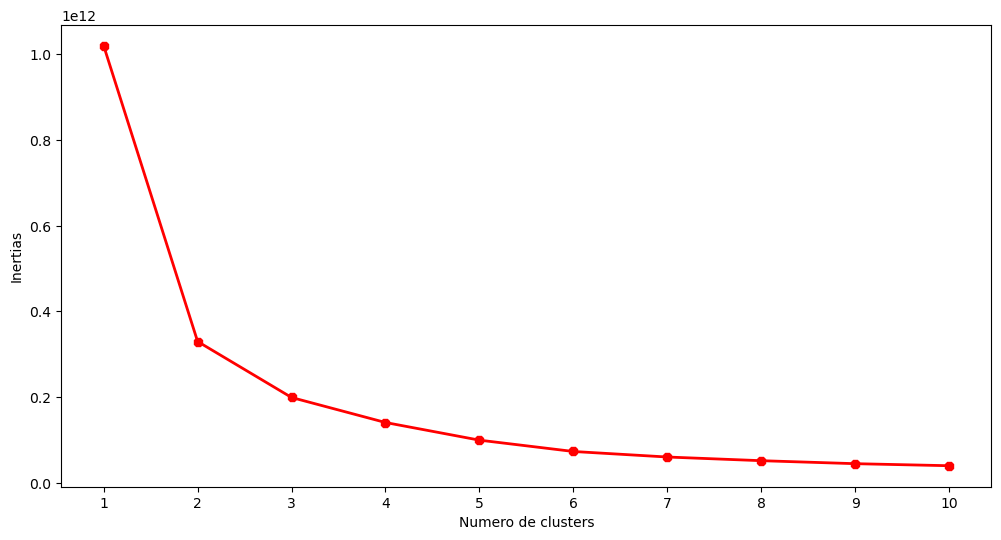

In [25]:
inertias = []

for k in range (1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(columnas_numericas1[columnas_numericas1.columns])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), inertias, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('Numero de clusters')
plt.xticks(range(1,11))
plt.ylabel('Inertias')
plt.show

### Creación del modelo

In [29]:
km= KMeans(n_clusters=3)
clusters = km.fit_predict(columnas_numericas1[columnas_numericas1.columns])
columnas_numericas1['clusters'] = clusters
columnas_numericas1.head()

C:\Users\apico\anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\apico\anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AgeCustomer,MediaCmp,TotalPurchases,TotalMnt,clusters
0,5524,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,1,55,0.0,22,1445,2
1,2174,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,60,0.0,4,25,2
2,4141,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,48,0.0,20,665,0
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,30,0.0,6,43,1
4,5324,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,33,0.0,14,376,2


### Visualización de los clusters

In [30]:
fig = px.scatter_3d(columnas_numericas1, x='Income', y = 'TotalPurchases', z= 'AgeCustomer', color = 'clusters')

fig.update_layout(
    autosize=False,
    width = 1000,
    height=800)

fig.show()

### Conclusión